# mallas

> Funciones para obtener variables de uso de suelo agregadas en mallas. 

In [ ]:
#| default_exp mallas

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
from pyLandUseMX.descargas import *

In [ ]:
%load_ext autoreload
%autoreload 2

Algunos tipos de análisis, como las regresiones de uso de suelo para contaminantes atomsféricos, utilizan datos de uso de suelo en mallas. Para este tipo de aplicaciones la librería provee un conjunto de herramientas para crear mallas y agregar datos en ellas.

## grid_from_layer

In [ ]:
#| export
def grid_from_layer(layer: gpd.GeoDataFrame, # Capa que define la extensión espacial de la malla
                    size: float # Tamaño de los elementos de la malla (en las unidades de la proyección de `layer`)
                    ) -> gpd.GeoDataFrame:
    """ 
    Regresa un GeoDataFrame con la malla de la extensión de la capa (`layer`) que se le pase y de tamaño `size`.
    
    """
    xmin, ymin, xmax, ymax = layer.total_bounds
    cols = list(np.arange(xmin, xmax + size, size))
    rows = list(np.arange(ymin, ymax + size, size))

    polygons = []
    for x in cols[:-1]:
        for y in rows[:-1]:
            polygons.append(Polygon([(x,y), (x + size, y), (x + size, y + size), (x, y + size)]))

    grid = gpd.GeoDataFrame({'geometry':polygons}).set_crs(layer.crs)
    return grid

Probemos la función utilizando los polígonos de las 100 ciudades más grandes de Mérxico y seleccionando uno.

El archivo ya está descargado


<AxesSubplot:>

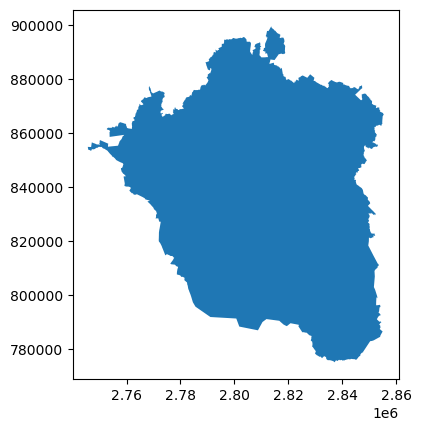

In [ ]:
descarga_poligonos_ciudades()
zmvm = gpd.read_file("datos/descargas/silhuetas.shp.zip")
zmvm = zmvm.loc[zmvm.CVE_SUN == '13']
zmvm.plot()

Pasamos el polígono a la función `grid_from_layer` para construir la malla y graficamos las dos capas juntas.

<AxesSubplot:>

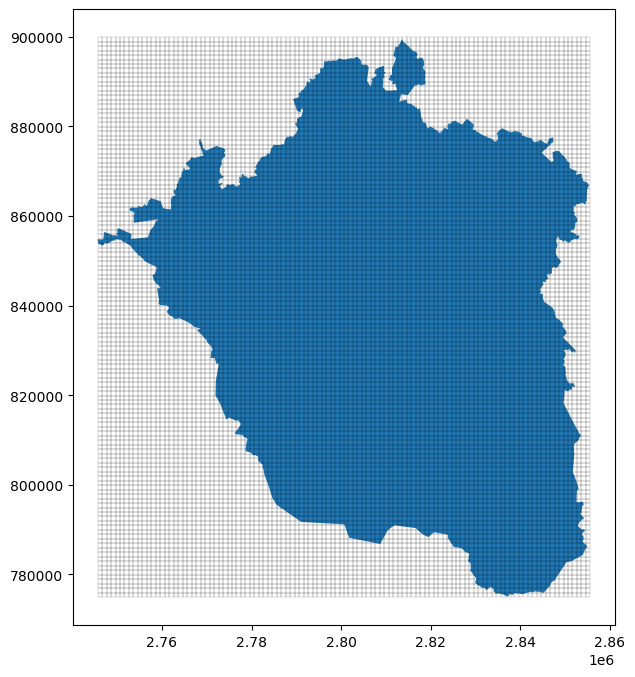

In [ ]:
malla = grid_from_layer(zmvm, 1000)
fig, ax = plt.subplots(figsize=(8, 8))
zmvm.plot(ax=ax)
malla.boundary.plot(ax=ax, edgecolor="black", linewidth=0.1)